## Feature Engineering

Will bring together various techniques for feature engineering.
This would give you an idea of the end-to-end pipeline to build machine learning algorithms.

will:
- build a lasso
- use feature-engine for the feature engineering steps
- set up an entire engineering and prediction pipeline using a Scikit-learn Pipeline

===================================================================================================



We will use the House Prices dataset.

In [52]:
!pip install feature_engine

## House Prices dataset

In [53]:
import warnings 
warnings.filterwarnings('ignore')

from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

pd.pandas.set_option('display.max_columns', None)

In [54]:
'''
Download dataset
'''
!wget = https://hr-projects-assets-prod.s3.amazonaws.com/cnjqbce2gfg/ba26e5aee7029d68d6adc1ab20cf3c54/houseprice.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load Datasets

In [55]:
'''
load dataset, file : houseprice.csv
'''

data = pd.read_csv("houseprice.csv")

### Types of variables 

Go ahead and find out what types of variables there are in this dataset

In [56]:
'''
inspect the type of variables
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are a mixture of categorical and numerical variables. Numerical are those of type **int** and **float** and categorical those of type **object**.

Id is a unique identifier for each of the houses. Thus this is not a variable that we can use.

#### Find categorical variables

In [58]:
'''
find categorical variables
'''

categorical = [var for var in data.columns if data[var].dtypes == 'O']

print('There are {} categorical variables'.format(len(categorical)))

There are 43 categorical variables


In [59]:
data[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Find temporal variables

There are a few variables in the dataset that are temporal. They indicate the year in which something happened. We shouldn't use these variables straightaway for model building. We should instead transform them to capture some sort of time information. Let's inspect these temporal variables:


In [60]:
'''
make a list of the numerical variables first
'''

numerical = [var for var in data.columns if data[var].dtypes != 'O']

'''
list of variables that contain year information
'''
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [61]:
data[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


We can see that these variables correspond to the years in which the houses were built or remodeled or a garage was built, or the house was indeed sold. It would be better if we captured the time elapsed between the time the house was built and the time the house was sold for example. We are going to do that in the feature engineering section later. 

We have another temporal variable: MoSold, which indicates the month in which the house was sold. Let's inspect if the house price varies with the time of the year in which it is sold:

<AxesSubplot:title={'center':'House sale per month'}, xlabel='MoSold'>

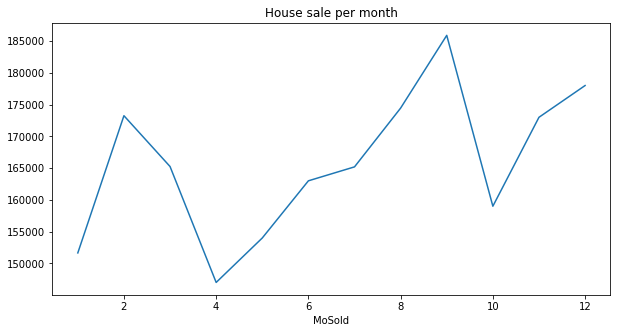

In [62]:
'''
plot median house price per month in which it was sold
'''
month_df = data.groupby(data["MoSold"]).median()
month_df.SalePrice.plot(figsize =(10,5),title = "House sale per month")


### Q1 . Dose the price seems to vary depending on the month in which the house is sold?

    A. No
    B. Yes
    
    assgin A or B to q1.

In [63]:
# Replace "X" with A or B
q1 = str("B")

In [64]:
'''
Please run this cell to to, submit your option for evalutaion
'''

file=open("submit0.txt","w+")

s0=q1
file.write(s0)
file.write("\n")
file.close()

#### Find discrete variables

To identify discrete variables, we will select from all the numerical ones, those that contain a finite and small number of distinct values.

In [65]:
'''
visualise the values of the discrete variables
'''
discrete = []
for var in numerical:
    if len(data[var].unique()) < 20 and var not in year_vars+['Id']:
        print(var, 'values', data[var].unique())
        discrete.append(var)
# Code

print('There are {} discrete variables'.format(len(discrete)))

MSSubClass values [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual values [ 7  6  8  5  9  4 10  3  1  2]
OverallCond values [5 8 6 7 4 2 3 9 1]
BsmtFullBath values [1 0 2 3]
BsmtHalfBath values [0 1 2]
FullBath values [2 1 3 0]
HalfBath values [1 0 2]
BedroomAbvGr values [3 4 1 2 0 5 6 8]
KitchenAbvGr values [1 2 3 0]
TotRmsAbvGrd values [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces values [0 1 2 3]
GarageCars values [2 3 1 0 4]
PoolArea values [  0 512 648 576 555 480 519 738]
MoSold values [ 2  5  9 12 10  8 11  4  1  7  3  6]
There are 14 discrete variables


#### Continuous variables

In [66]:
'''
find continuous variables
let's remember to skip the Id variable and the target variable SalePrice
which are both also numerical'''

numerical = [var for var in numerical if var not in discrete+year_vars+['Id']+['SalePrice']]

print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 18 numerical and continuous variables


    Now we have inspected and have a view of the different types of variables that we have in the house price dataset. 
    Let's move on to understand the types of problems that these variables have.

### Types of problems within the variables

#### Missing values

In [67]:
'''
Find variables with NA and the percentage of NA
'''
var_na = [var for var in data.columns if data[var].isnull().sum() > 0]
var_na
# Code

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

#### Outliers and distributions

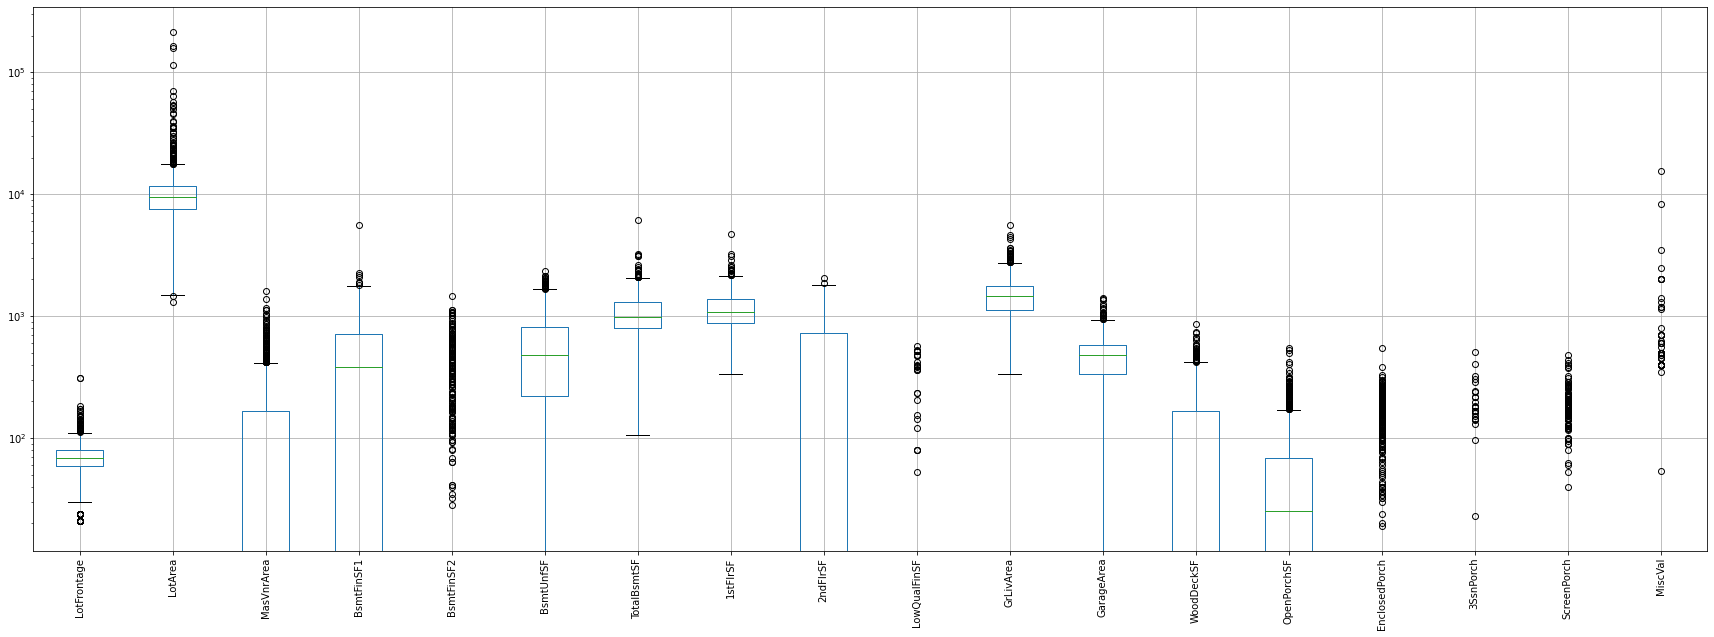

In [68]:
'''
let's make boxplots to visualise outliers in the continuous variables 
and histograms to get an idea of the distribution
'''
con_df = data[numerical]
f1, ax1 = plt.subplots(1,1, figsize = (30, 10))
ax1 = con_df.boxplot(rot = 90)
ax1.set_yscale('log')
#code

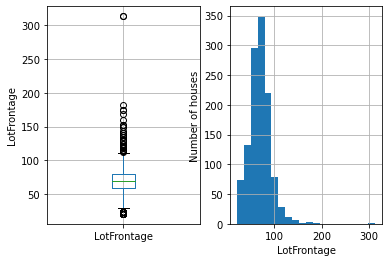

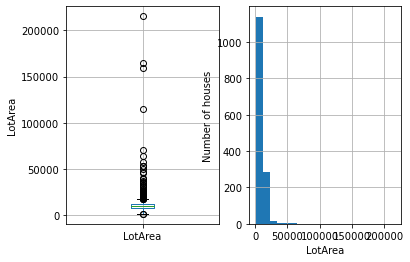

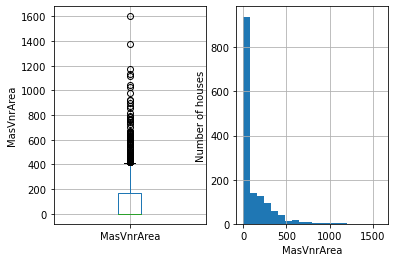

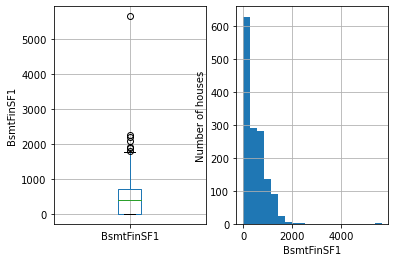

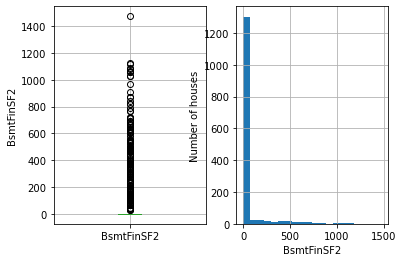

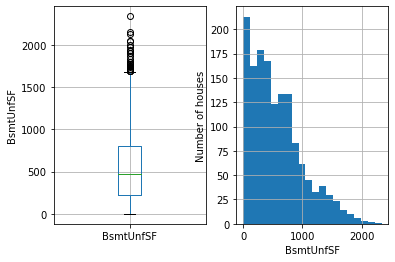

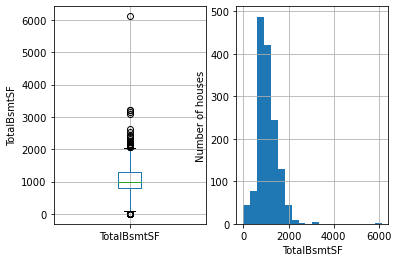

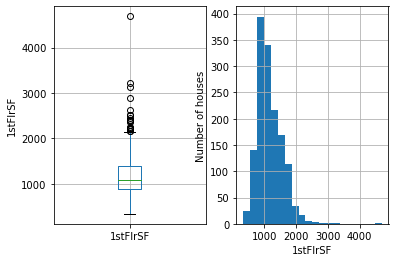

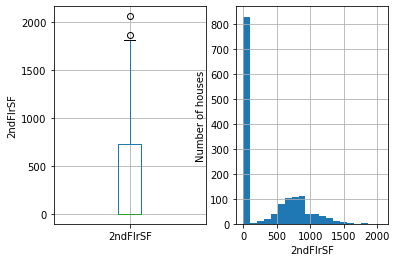

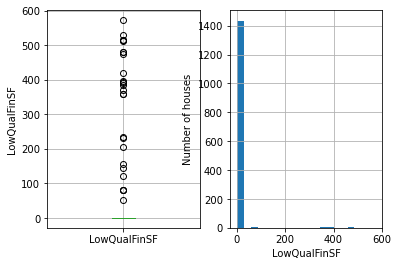

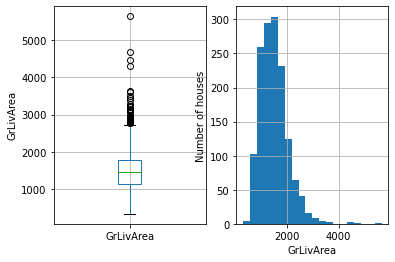

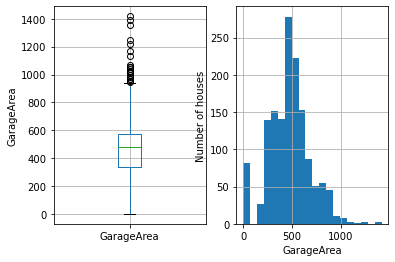

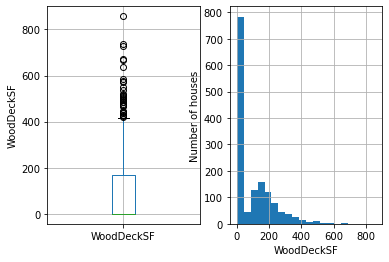

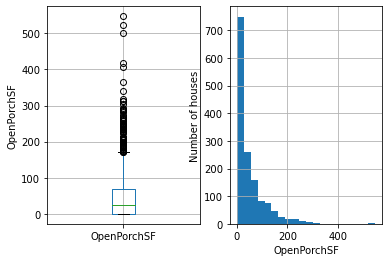

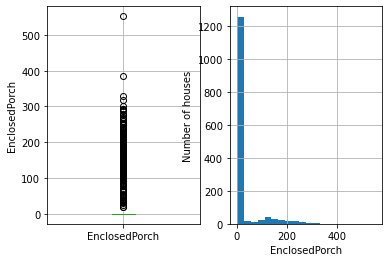

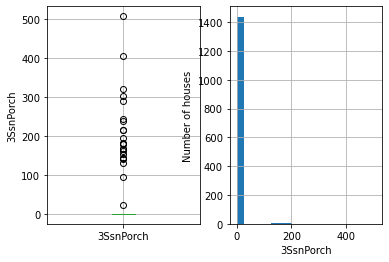

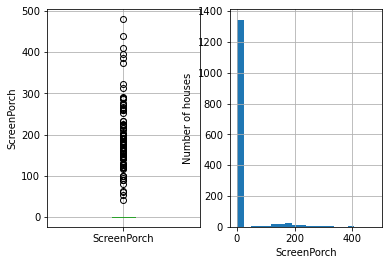

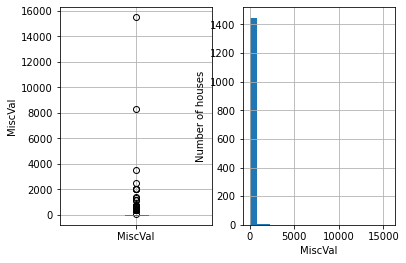

In [69]:
#method-2
for var in numerical:
    plt.figure(figsize =(6,4))
    plt.subplot(1,2,1)
    fig = data.boxplot(column = var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1,2,2)
    fig = data[var].hist(bins = 20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)
    
    plt.show()

#### Outliers in discrete variables

Now, let's identify outliers in the discrete variables.
**Discrete variables can be pre-processed / engineered as if they were categorical**. 

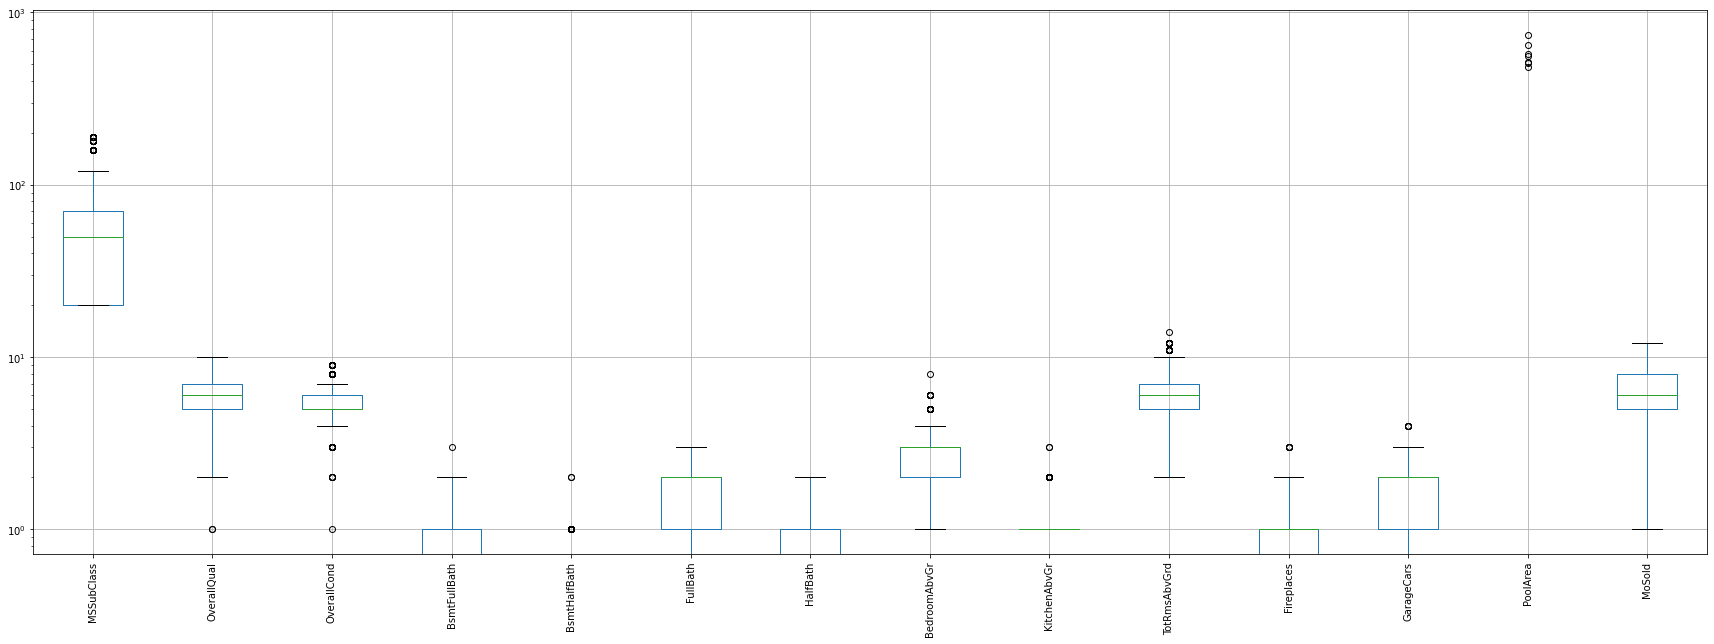

In [70]:
'''
outlies in discrete variables
'''
dis_df = data[discrete]
f1, ax1 = plt.subplots(1,1, figsize = (30, 10))
ax1 = dis_df.boxplot(rot = 90)
ax1.set_yscale('log')
# Code

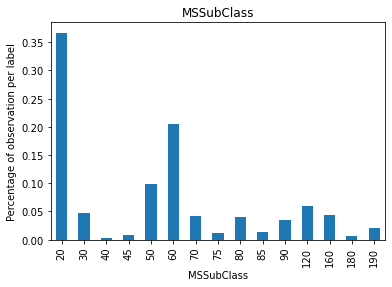

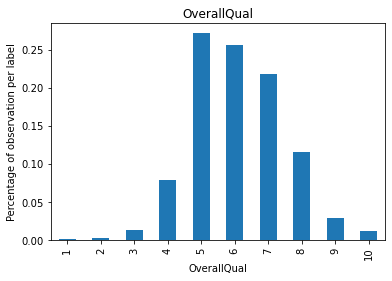

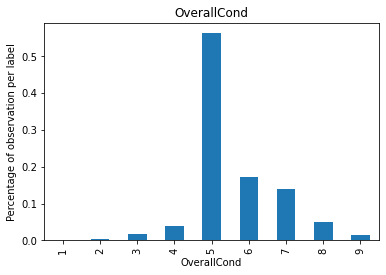

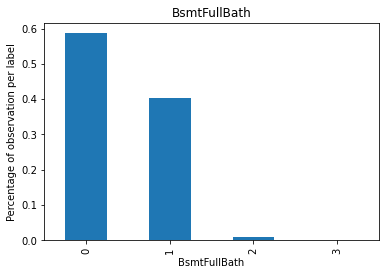

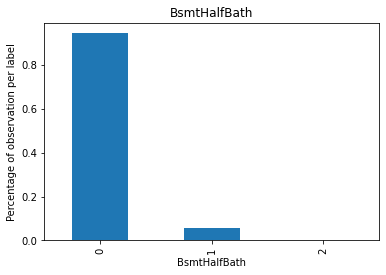

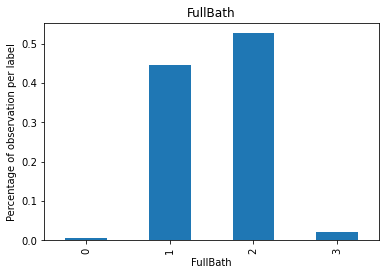

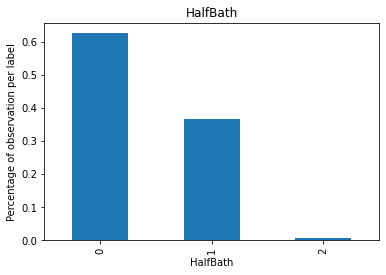

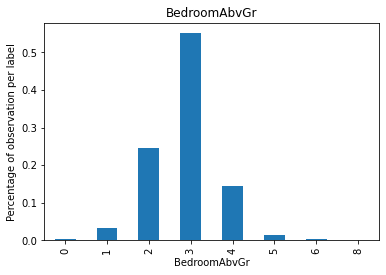

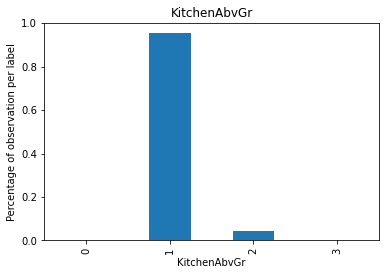

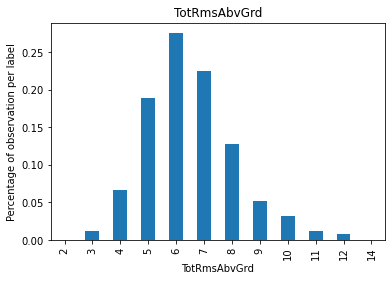

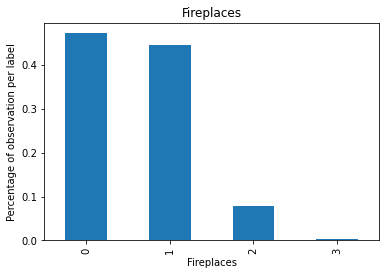

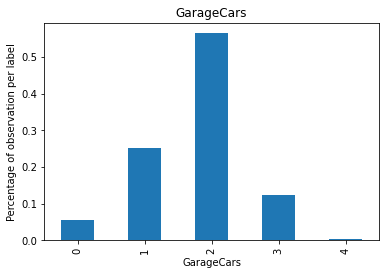

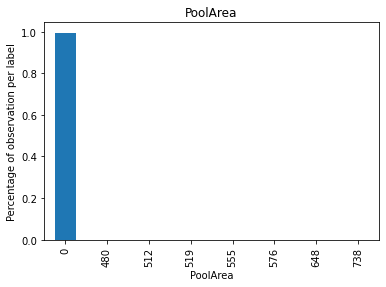

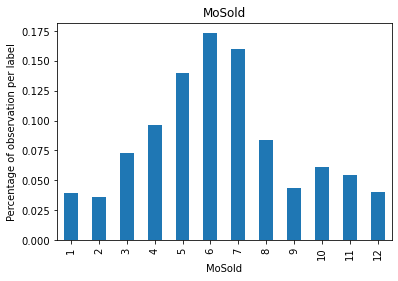

In [71]:
for var in discrete:
    (data.groupby(var)[var].count()/np.float(len(data))).plot.bar()
    plt.ylabel("Percentage of observation per label")
    plt.title(var)
    plt.show()

### Monotonicity between discrete variables and target values

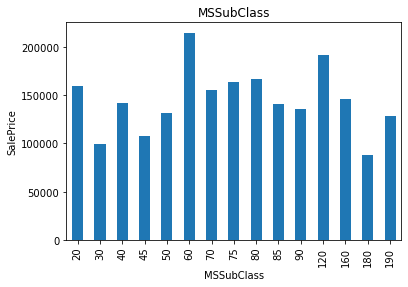

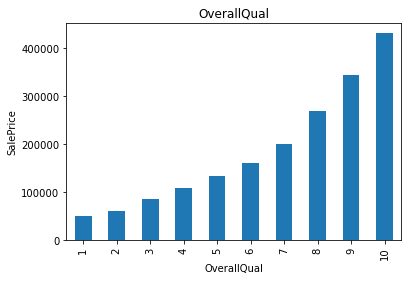

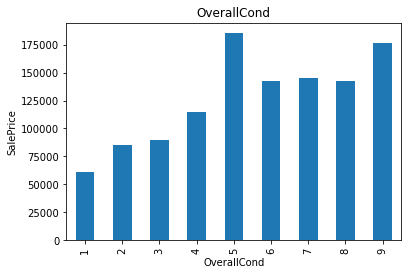

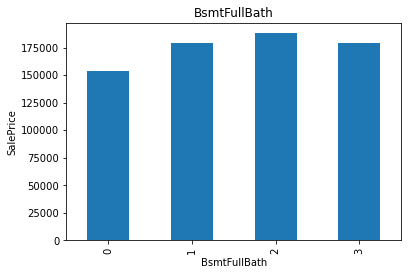

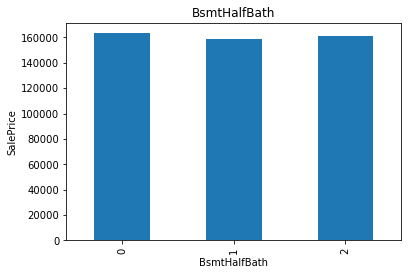

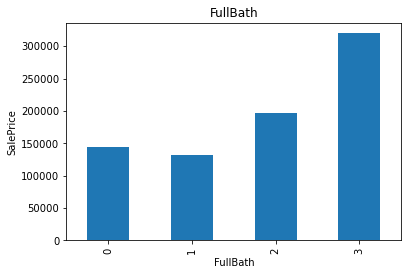

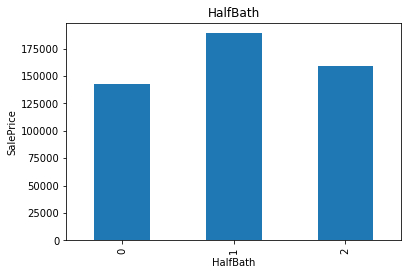

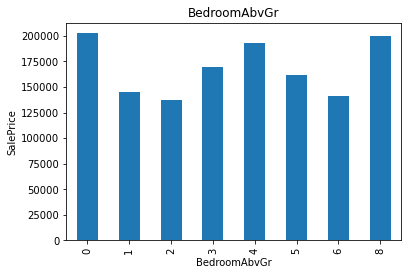

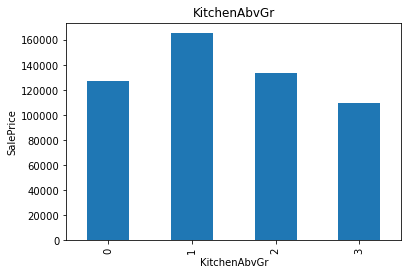

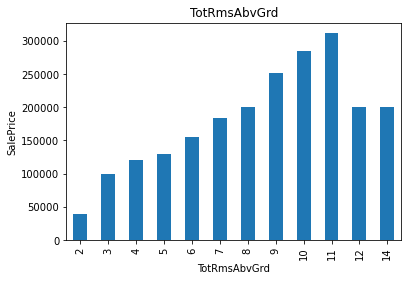

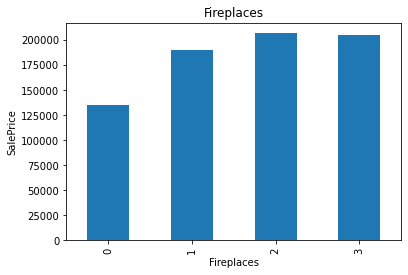

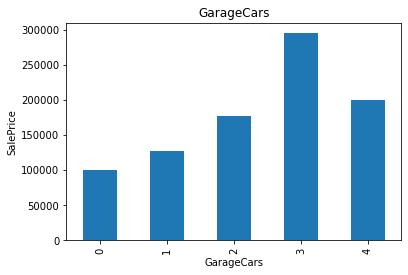

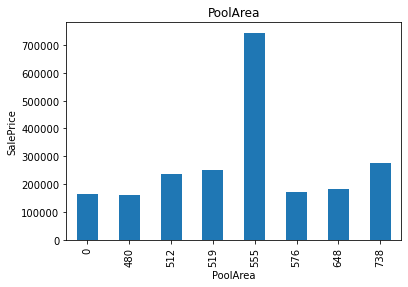

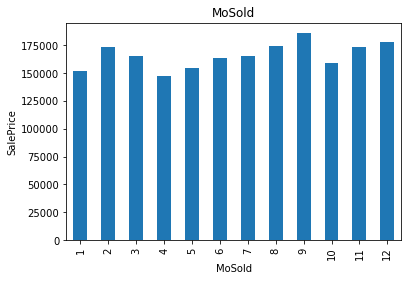

In [72]:
'''
plot the median sale price per value of the discrete
variable
'''
def mono_plot(df,var):
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in discrete:
    mono_plot(data, var)

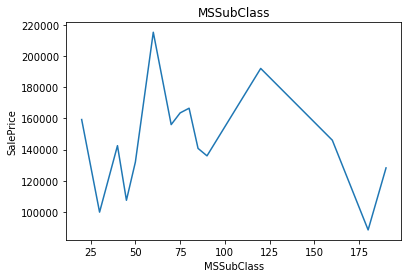

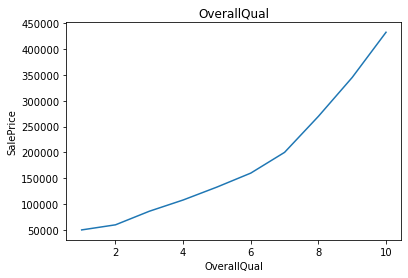

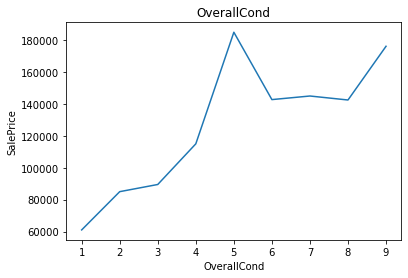

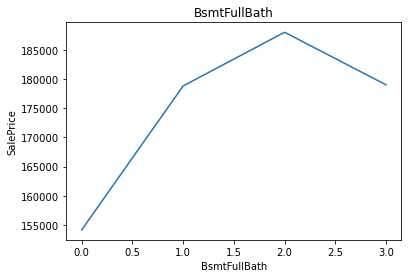

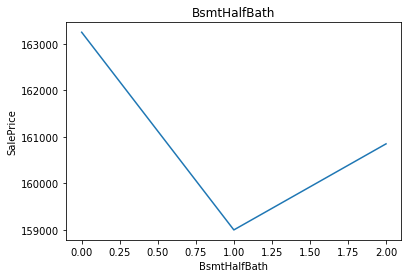

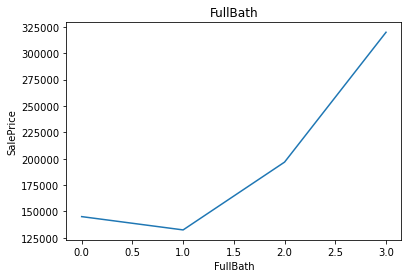

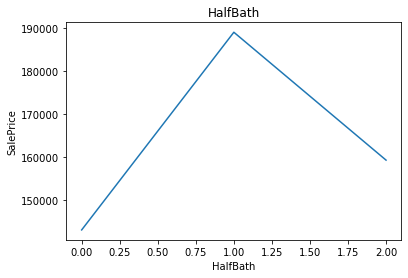

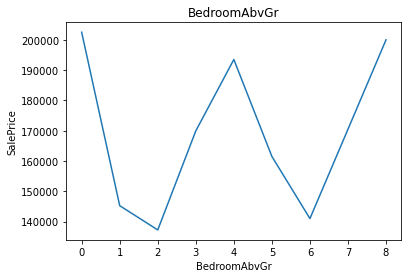

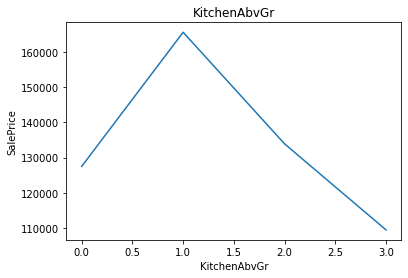

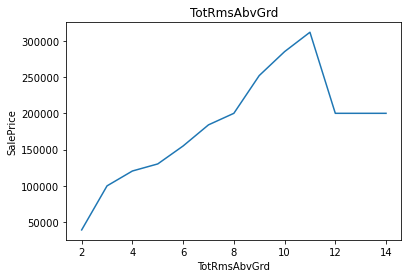

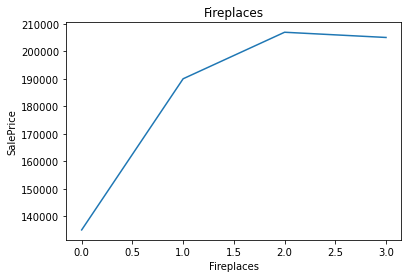

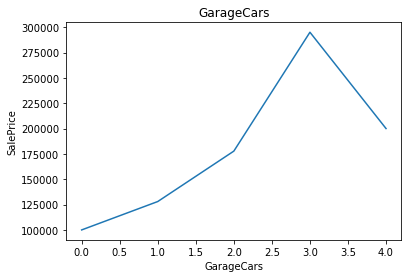

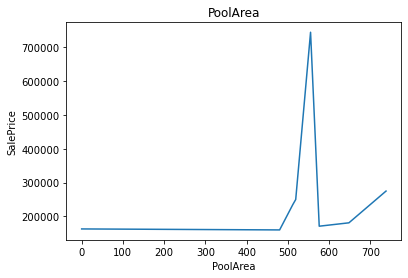

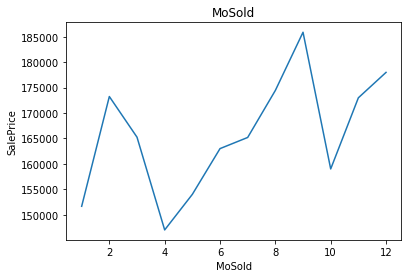

In [73]:
def dis_plot(df,var):
    df.groupby(var)['SalePrice'].median().plot()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in discrete:
    dis_plot(data, var)

Some of the discrete variables show some sort of monotonic relationship and some don't.

#### Number of labels: cardinality

Let's go ahead now and examine the cardinality of our categorical variables. That is, the number of different labels.

Text(0, 0.5, 'Number of different categories')

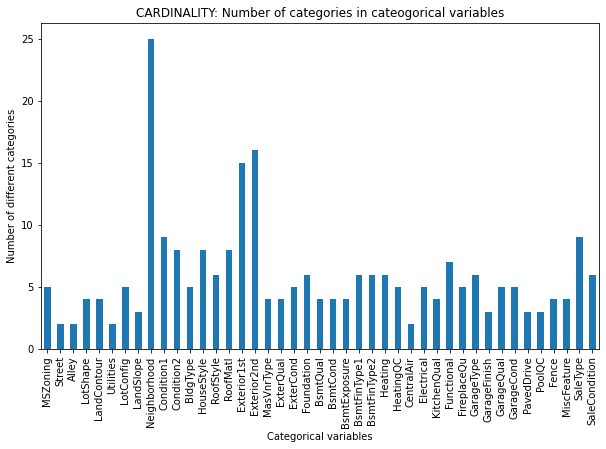

In [74]:
'''
plot number of categories per categorical variable
'''
data[categorical].nunique().plot.bar(figsize=(10,6))
plt.title('CARDINALITY: Number of categories in cateogorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')
# Code

Most of the variables, contain only a few labels. Then, we do not have to deal with high cardinality.

### Separate train and test set

In [75]:
'''
Split data into train and test set
'''

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape

((1168, 79), (292, 79))

**Now we will move on and engineer the features of this dataset. The most important part for this course.**

### Temporal variables 

First, we will create those temporal variables.

In [76]:
'''
function to calculate elapsed time
'''

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

In [77]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [78]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
254,53,53,53.0
1066,16,15,16.0
638,98,58,NaN
799,70,57,68.0
380,86,60,86.0


Instead of the "year", now we have the amount of **years that passed** since the house was built or remodeled and the house was sold. Next, we drop the YrSold variable from the datasets, because we already extracted its value.

In [79]:
'''
drop YrSold
'''
X_train.drop(['YrSold'], axis=1, inplace=True)
X_test.drop(['YrSold'], axis=1, inplace=True)

In [80]:
'''
capture the column names for later use in the notebook
'''
final_columns = X_train.columns

### Missing data imputation
#### Continuous variables

In [81]:
year_vars.remove('YrSold')
for col in numerical+year_vars:
    if X_train[col].isnull().mean()>0:
        print(col,X_train[col].isnull().mean())

LotFrontage 0.1857876712328767
MasVnrArea 0.005136986301369863
GarageYrBlt 0.0547945205479452


In [82]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Alley 0.9366438356164384
MasVnrType 0.005136986301369863
BsmtQual 0.023972602739726026
BsmtCond 0.023972602739726026
BsmtExposure 0.023972602739726026
BsmtFinType1 0.023972602739726026
BsmtFinType2 0.023972602739726026
Electrical 0.0008561643835616438
FireplaceQu 0.4683219178082192
GarageType 0.0547945205479452
GarageFinish 0.0547945205479452
GarageQual 0.0547945205479452
GarageCond 0.0547945205479452
PoolQC 0.9948630136986302
Fence 0.800513698630137
MiscFeature 0.9606164383561644


In [83]:
'''
print variables with missing data
keep in mind that now that we created those new temporal variables, we
are going to treat them as numerical and continuous:
'''
vars_na2 = [var for var in final_columns if X_train[var].isnull().sum() > 0]
vars_na2
'''
remove YrSold from the variable list
because it is no longer in our dataset
'''


'''
examine percentage of missing values
'''


'\nexamine percentage of missing values\n'

In [89]:
'''
print variables with missing data
'''
vars_na2


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [90]:
'''
will treat discrete variables as if they were categorical
to treat discrete as categorical using Feature-engine
we need to re-cast them as object
'''
X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

## Putting it all together

Create pipeline using following parameter

   ### Pipeline
    
       # missing data imputation
       
       AddMissingIndicator : varibales = 'LotFrontage', 'MasVnrArea',  'GarageYrBlt'
       MeanMedianImputer   : imputation_method='median',
                              variables= 'LotFrontage', 'MasVnrArea',  'GarageYrBlt'
       CategoricalImputer  : variables= categorical
       
       
       # categorical encoding
       
       RareLabelEncoder    : tol=0.05, n_categories=6, variables= categorical+discrete
       OrdinalEncoder      : encoding_method='ordered', variables=categorical+discrete
       
       # discretisation + encoding 
       
       EqualFrequencyDiscretiser : q=5, return_object=True, variables=numerical
       OrdinalEncoder      : encoding_method='ordered', variables=numerical
       
       # feature Scaling
       StandardScaler
       
       # regression
       Lasso : random_state=42

In [94]:
house_pipe = Pipeline([('missing_ind', mdi.AddMissingIndicator(variables = ['LotFrontage', 'MasVnrArea','GarageYrBlt'])),
     
    # replace NA by the median in the 3 variables below, they are numerical
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median', variables = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),
     
    # replace NA by adding the label "Missing" in categorical variables (transformer will skip those variables where there is no NA)
    ('imputer_cat', mdi.CategoricalImputer(variables = categorical)),
    ('RareLabelEncoder',ce.RareLabelEncoder(tol=0.05, n_categories=6, variables = categorical+discrete)),
    ('cat_encoding',ce.OrdinalEncoder(encoding_method='ordered', variables=categorical+discrete)),
    ('Discretisation', dsc.EqualFrequencyDiscretiser(q=5, return_object=True, variables=numerical)),
    ('encoding',ce.OrdinalEncoder(encoding_method='ordered', variables=numerical)),
    ('sc',StandardScaler()),
    ('Lasso',Lasso(random_state = 42))
    
    # median imputer
    # to handle those, I will add an additional step here
   ])

In [95]:
'''
fit the pipeline
'''
house_pipe.fit(X_train, y_train)
house_pipe.fit(X_test, y_test)

# let's get the predictions
X_test_preds = house_pipe.predict(X_test)

In [96]:
# a peek into the prediction values
X_test_preds

array([156878.39940514, 332837.34305278, 123182.78973758, 153245.71505937,
       308561.38636866,  85072.65390688, 278625.1289516 , 133090.89929726,
        83589.78025883, 118946.85648928, 157088.56643854, 102363.60246901,
       103405.06660804, 208732.86150267, 141731.55863557, 130615.55000856,
       192079.3003794 , 129982.70059871, 152982.83718555, 237041.03909106,
       170289.59254791, 197686.73947887, 179657.47885422, 115149.81061248,
       232402.88929104, 176646.64843725, 223805.84740689, 131428.13292821,
       188859.96263658, 196920.27167025, 112341.22113293, 285096.7171991 ,
       212311.49896023, 108667.16073754, 264408.03835127, 133390.77222903,
       121899.53535799, 198515.60345309, 258930.09968659,  96579.31954305,
       116124.61507882, 235158.86286284, 108006.52992305, 354054.25085686,
       138055.90704216, 175924.37329507,  93388.99819926, 117694.23322774,
       396982.15428714, 138049.28903838, 114192.64674214, 229553.04207152,
       103362.1643265 , 3

In [97]:
MSE_ = mean_squared_error(y_test, X_test_preds)
RMSE_ = sqrt(mean_squared_error(y_test, X_test_preds))
r2_ = r2_score(y_test, X_test_preds)

print('test mse: {}'.format(MSE_))
print('test rmse: {}'.format(RMSE_))
print('test r2: {}'.format(r2_))

test mse: 979915645.1809626
test rmse: 31303.604348077275
test r2: 0.8722458968873087


In [98]:
'''
Please run this cell to to, submit your answer for evalutaion
'''

file=open("submit2.txt","w+")
file.write(str(RMSE_))
file.write("\n")
file.write(str(MSE_))
file.write("\n")
file.write(str(r2_))
file.write("\n")
file.close()

Text(0, 0.5, 'Predicted Price')

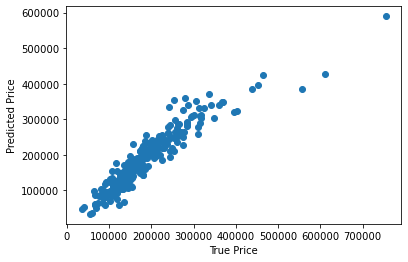

In [99]:
'''
plot predictions vs real value
'''

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

<AxesSubplot:>

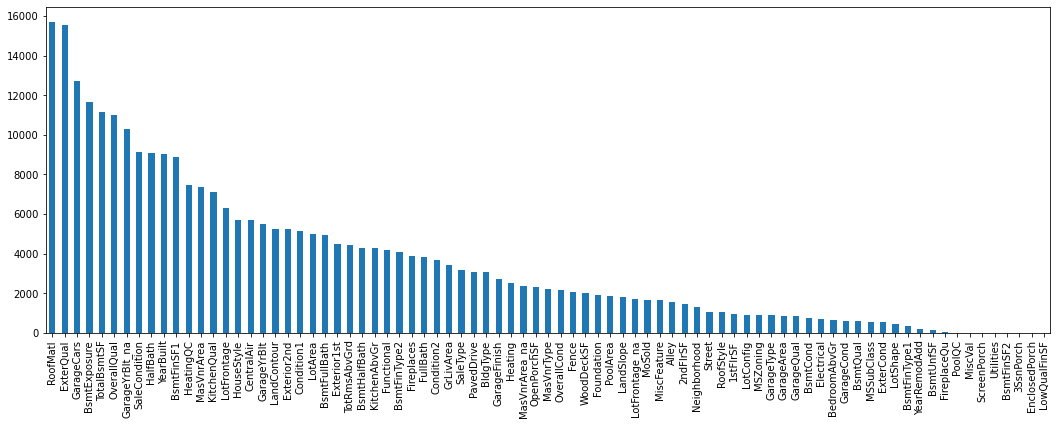

In [101]:
'''
explore the importance of the features
'''
importance = pd.Series(np.abs(house_pipe.named_steps['Lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))